In [1]:
import pybedtools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# TFBS Combinations

## Extract GTEx Genexpression

In [2]:
GTEx_with_tfbs = pybedtools.BedTool("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Promotor_with_TFBS/All_GTEx_Prom_with_TFBS.bed")

In [4]:
first = GTEx_with_tfbs[0]

In [10]:
first.fields

['chr1',
 '17436',
 '17636',
 'ENSG00000278267.1',
 '0',
 '-',
 'MYCN',
 '17510',
 '17522',
 '-',
 'miRNA',
 '0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,']

In [15]:
# with open("write_csv.csv", "w") as f:
#     for i in GTEx_with_tfbs[0:100]:
#         f.write(f"{i.name},{i.fields[11][:-1]}\n")

In [16]:
df = pd.read_csv("write_csv.csv")

In [19]:
test = pd.read_csv("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/raw_data/gtex/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct", sep="\t", skiprows=2)

In [26]:
csv_string = ",".join(test.columns)
print(csv_string)

Name,Description,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra,Breast - Mammary Tissue,Cells - Cultured fibroblasts,Cells - EBV-transformed lymphocytes,Cervix - Ectocervix,Cervix - Endocervix,Colon - Sigmoid,Colon - Transverse,Esophagus - Gastroesophageal Junction,Esophagus - Mucosa,Esophagus - Muscularis,Fallopian Tube,Heart - Atrial Appendage,Heart - Left Ventricle,Kidney - Cortex,Kidney - Medulla,Liver,Lung,Minor Salivary Gland,Muscle - Skeletal,Nerve - Tibial,Ovary,Pancreas,Pituitary,Prostate,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower l

## Filter for TFBS or TFBS combinations

In [2]:
data = pybedtools.BedTool("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Promotor_with_TFBS/All_GTEx_Prom_with_TFBS.bed")

In [3]:
data.head()

chr1	17436	17636	ENSG00000278267.1	0	-	MYCN	74	86	-	miRNA	0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
 chr1	629439	629639	ENSG00000225630.1	730	+	OTX2	-11	1	-	unprocessed_pseudogene	961.4,1024,949.35,328.1,497.15,363.6,518.8,1182,1160,1568,638.6,851.2,1275,990.9,1320,1213.5,1315,1591,1228,1440,902.9,207.95,180.7,370.8,427.8,826.4,777.5,814.1,335.2,798.7,510.5,1157,1283.5,1149,864.8,754.9,447.2,484.3,760.1,602.9,385.65,320.05,541.9,772.4,604.95,573.3,748.9,342.4,887.1,562,559,441.2,394.05,53.19,
 chr1	634176	634376	ENSG00000198744.5	483	+	EGR2	170	181	+	unprocessed_pseudogene	19.46,17.82,28.275,9.633,12.73,13.52,11.34,40.195,36.9,30.34,21.63,23.05,29.58,32.36,49.13,36.375,37.295,31.25,22.06,32.93,18.46,11.145,8.255,8.538,9.101,16.43,22.555,18.51,12.34,18.61,10.82,35.74,48.98,40.82,18.575,21.435,12.21,14.485,25.13,14,10.052,6.905,14.03,17.25,18.495,19.47,20.65,10.04,19.89,19.92,19.29,10.595,11.63,4.395,
 chr1	758336	758536	

 ### Genereating Subsets based on TFBS or TFBS pair in data.

In [3]:
def func_for_tfbs_subset(BedTool_Interval, tfbs_lst):
    """
    Function that returns TRUE, if all of the tfbs in tfbs_lst are in Interval.fields[6]
    It also checks if tfbs in tfbs_lst occur more often then tfbs in Interval.fields[6]. 
    Therefore if tfbs_lst contains the same tfbs twice, it will only return True if Interval.fields[6] also contains the tfbs at least twice. 
    """

    # Processing tfbs_lst --> unique with counts
    input_tfbs_unique, input_tfbs_counts = np.unique(np.array(tfbs_lst), return_counts=True)
    input_tfbs_dict = dict(zip(input_tfbs_unique, input_tfbs_counts))
    
    # Processing tfbs in interval --> split tfbs, distance, strand into lists
    tfbs_arr = np.array(BedTool_Interval.fields[6].split(","))

    # get unique tfbs and counts and save in dict
    tfbs_unique, tfbs_counts = np.unique(tfbs_arr, return_counts=True)
    tfbs_dict = dict(zip(tfbs_unique, tfbs_counts))

    # Compare unique values and counts (equal or more (?))

    # Checks if all unique TFBS in tfbs_lst occur in tfbs_unique.
    if np.all(np.isin(input_tfbs_unique, tfbs_unique)):
        
        # Checks how often tfbs occur in input list, compared to interval tfbs. If tfbs count in input list is higher then in interval it will return False.
        bool_lst = []
        for tfbs, input_count in input_tfbs_dict.items():
            tfbs_count = tfbs_dict[tfbs]
            if input_count > tfbs_count:
                bool_lst.append(False)
            else:
                bool_lst.append(True)
        if np.all(bool_lst):
            return True
        else:
            return False
        
        
    else:
        return False

Generating subsets of tfbs_pairs

In [7]:
tfbs_lst = ["SMAD3", "ATF2"]
atf_smad_BedTool = data.filter(func_for_tfbs_subset, tfbs_lst).saveas()

In [11]:
atf_smad_BedTool.head()

chr1	1724311	1724511	ENSG00000227775.3	407	+	RXRB,NR2C2,RXRA,CTCFL,NR2C1,THRB,RXRA,YY1,NR2F2,HLF,HNF4G,HNF4A,RARA,NR2F1,PPARG,MYB,MAFF,CEBPA,ELF1,SPI1,JUNB,EHF,NR3C1,RELA,ELF3,REL,NFKB2,RELB,IRF2,NFKB1,NEUROD1,JUN,AR,TCF12,RUNX1,FOXO1,ESR1,ESR1,HAND2,NR2F6,ETV5,THAP11,RXRA,RUNX1,ELK1,ETS1,FLI1,ETV4,ETV6,ERG,FOXK1,ELK4,ETV1,GABPA,ELF3,SPI1,IRF4,PPARG,E2F1,RBPJ,CREB1,NFIL3,PDX1,SRF,MYC,NFE2L2,TBX5,MYC,NR2C1,NR2C2,ATF2,NR2F2,JUN,CTCF,JUN,CREM,FOXA2,FOXP1,FOXK2,FOXA1,REST,TCF7L2,HOXB13,MLX,MYC,POU2F2,POU5F1,NFE2,FOSL2,CREB1,TP53,ATF3,BATF,PBX2,ATF3,JUN,CEBPA,JUNB,FOS,JUND,MYC,BHLHE40,MYC,E2F1,ELF4,ELK1,ELK4,ELF1,ELF3,SPI1,GABPA,USF2,MYB,NRF1,REST,MAFK,MAX,AR,NR3C1,RARA,E2F1,EGR1,SP1,MYC,MYC,SP2,BCL6,NRF1,TFE3,FOSL2,ELF4,FLI1,ETS1,IRF4,ERG,ELK1,ERF,STAT1,ETV1,ARNT,FOSL1,SP1,SMAD3,YY1,MAFK,JUND,POU5F1,CREB1,JUN,ATF7,RXRA,NFE2L2,NR1H2,RFX5,RXRA,TFDP1,KLF5,E2F6	134,133,129,137,140,134,131,138,139,149,137,134,131,134,133,144,142,148,89,86,66,88,87,94,90,94,91,94,87,92,135,95,87,113,116,119,117,

## Filter for geneType or chromosome if necessary

In [11]:
def filter_bed(BedTool, column_number, filter_content):
    """
    Function that filters a bed file by a specific content in a specific column.
    """
    filtered_BedTool = BedTool.filter(lambda x: x.fields[column_number] == filter_content)
    return filtered_BedTool

Filter for GeneType:

In [15]:
prot_coding = filter_bed(data, 10, "protein_coding")
prot_coding.saveas().head(2)

chr1	923727	923927	ENSG00000187634.11	386	+	PBX2,GLIS3,ARNT,BHLHE40,MYC,HIF1A,MYC,KLF9,RELB,PAX5,SP1,CREB1,RXRA,RXRA,TFAP2C,TFAP2A,TFAP2A,FOXA2,RUNX2,EGR1,JUN,ATF3,REST,CREB1,FOXO1,NFIC,TFAP2A,MYB,TCF7L2,YY1,CTCFL,E2F1,NRF1,E2F1,TFAP2A,TEAD4,NFE2,JUN,JUND,SMAD3,NFE2L2,JUN,ESR1,ESR1,ERG,BACH1,MAX,MYCN,MYC,E2F1,MYC,KLF5,FLI1,TFAP2C,TFAP2A,TCF12,ETS1,NEUROD1,GABPA,ETV1,MYC,CTCF,CTCF,THAP11,TFAP4,REST,SP1,RUNX1,TFAP2A	74,64,76,74,73,75,73,70,91,75,72,78,79,76,86,86,87,29,123,-2,0,2,-7,2,9,19,64,31,27,31,48,54,55,52,62,167,149,145,148,148,148,148,151,151,95,174,182,181,181,181,182,184,95,126,126,94,95,93,93,93,94,91,93,97,108,104,112,121,126	87,78,82,84,84,85,85,86,102,87,87,91,94,95,99,99,99,40,132,12,13,14,14,15,20,30,76,41,41,43,60,66,66,74,76,179,160,160,161,162,163,164,168,168,105,189,192,193,193,193,193,194,105,138,140,105,105,106,107,107,109,110,112,116,118,125,127,132,138	+,+,-,-,-,-,+,+,+,-,+,+,-,+,-,-,+,-,+,-,-,+,-,+,+,-,+,-,-,-,-,+,+,-,-,+,+,-,+,+,+,+,+,-,+,-,-,-,-,-,+,+,+,+,+,+,

Filter for chromosome:

In [17]:
chr22_data = filter_bed(data,0,"chr22")
chr22_data.saveas().head(3)

chr22	10961338	10961538	ENSG00000283047.1	114	-	FOXA1,ESR1,GRHL2	112,83,145	124,100,157	+,+,-	unprocessed_pseudogene	0.106,0.061,0.053,0.091,0.081,0.117,0.116,0.029,0.033,0.033,0.111,0.087,0.039,0.054,0.026,0.035,0.035,0.035,0.031,0.032,0.101,0.15,0.104,0.133,0.123,0.106,0.063,0.08,0.044,0.087,0.17,0.041,0.026,0.044,0.073,0,0.087,0.061,0.026,0.108,0.125,0.02,0.089,0.074,0.056,0.06,0.06,0.099,0.057,0.456,0.093,0.138,0.065,0,
 chr22	11066217	11066417	ENSG00000279973.2	28	+	MYC,CTCF,MYC	146,-9,132	157,10,144	-,+,+	lincRNA	0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.51,0,0,0,0,
 chr22	12602265	12602465	ENSG00000283023.1	108	+	YY1,E2F6,USF2,REST,ESR1,TEAD3,ETV5,ELF3,ETV1,ELF1,GABPA,ELF4,IRF2,SPI1	198,15,44,48,96,158,175,173,174,174,174,176,172,171	210,28,58,69,113,166,186,187,188,188,188,188,190,191	-,-,-,-,+,+,-,-,+,+,-,+,+,+	unprocessed_pseudogene	0.089,0.066,0.047,0.11,0.079,0.098,0.104,0.033,0.027,0.042,0.077,0.06,0.04,0.046,0.032,

## Extract Important Data

Important informations that should be easily accesible:
- GeneID
- TFBSs with TSS distances and Template/non-Template 
- TFBS-count in Promotor (TFBS unique (?))

Other informations that could be adressed:
- Genomic locations of Promotor
- (Score of Genexpression (?) only in GTEx file slightly interesting)
- Overlapping TFBS from diffrent TFs --> More than 50% (?) --> only one TF can bind --> TF sets that competes for binding?

### Get Dataframe for filtered TFBS combinations

In [238]:
def get_information_for_singel_tfbs_set(BedTool_Interval):
    """
    Function that is splitting the infomration about the TFBS, such as TSS-distance and strand oriantation and saving it in a Dataframe.
    """
    # Splitting infomration into numpy arrays
    tfbs_arr = np.array(BedTool_Interval.fields[6].split(","))
    tfbs_close_tss_arr = np.array(BedTool_Interval.fields[7].split(","), dtype="int")
    tfbs_dist_tss_arr = np.array(BedTool_Interval.fields[8].split(","), dtype="int")

    # Get information if tfbs is on same strand as gene or not (True, False)
    tfbs_strand = np.array(BedTool_Interval.fields[9].split(","))
    tfbs_strand_orientation = np.array(["nT" if i==BedTool_Interval.fields[5] else "T" for i in tfbs_strand])

    # Generate a numpy array, that contains the GeneID, necessary for additional functions. Its a array with the same length as the other, but all containting the same GeneID.
    geneID = np.array([BedTool_Interval.fields[3] for i in range(len(tfbs_arr))])
    chr = np.array([BedTool_Interval.fields[0] for i in range(len(tfbs_arr))])

    # Generate a numpy array, that contains the count of all tfbs. Its a array with the same length as the other, but all containting the same tfbs count.
    tfbs_count = np.array([len(tfbs_arr)+1 for i in range(len(tfbs_arr))])
    # Generate a numpy array, that contains the count of all unqiue tfbs.(s.o)
    tfbs_unique_count = np.array([len(np.unique(tfbs_arr))+1 for i in range(len(tfbs_arr))])

    return chr, geneID, tfbs_arr, tfbs_close_tss_arr, tfbs_dist_tss_arr, tfbs_strand_orientation, tfbs_count, tfbs_unique_count

In [149]:
*_, strand = get_information_for_singel_tfbs_set(test_int)
strand

array(['T', 'T', 'nT', 'T', 'T', 'T', 'T', 'T', 'T', 'nT', 'T', 'T', 'T',
       'T', 'T', 'nT', 'T', 'nT', 'T', 'T', 'nT', 'nT', 'T', 'nT', 'nT',
       'nT', 'nT', 'T', 'T', 'T', 'nT', 'T', 'T', 'T', 'T', 'T', 'nT',
       'T', 'T', 'T', 'nT', 'nT', 'nT', 'nT', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'nT', 'T', 'nT', 'nT', 'T', 'T', 'T', 'nT', 'nT', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'nT', 'T', 'T', 'nT', 'T', 'T', 'T',
       'nT', 'nT', 'T', 'T', 'T', 'T', 'nT', 'nT', 'nT', 'T', 'nT', 'T',
       'T', 'nT', 'T', 'T', 'nT', 'nT', 'nT', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'nT', 'T', 'T', 'nT', 'T', 'T', 'nT', 'T', 'nT', 'T',
       'nT', 'T', 'nT', 'nT', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'nT', 'T', 'nT', 'nT', 'nT', 'nT', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'nT', 'T', 'nT', 'nT', 'nT', 'nT', 'nT', 'T', 'nT', 'nT',
       'nT', 'nT', 'T', 'nT', 'nT', 'T', 'T', 'T', 'nT', 'T', 'nT'],
      dtype='<U2')

In [239]:
def expand_tfbs_information_to_df(BedTool):
    # Information for Promotor/Gene. Will be the same for all TFBS in one Region
    chr_all = np.array([])
    geneID_all = np.array([])

    # Information about specific TFBS, such as name, tss-distance and orientation
    tfbs_all = np.array([])
    tfbs_close_tss_all = np.array([])
    tfbs_dist_tss_all = np.array([])
    tfbs_orientation_all = np.array([])

    # Meta-Information about all TFBSs in one promotor region. Will be the same for each geneID.
    tfbs_count_all = np.array([])
    tfbs_unique_count_all =np.array([])

    for BedTool_Interval in BedTool:
        # Extracting information about one Promotor. Each Promotor returning array with the length of the tfbs-count.
        chr, geneID, tfbs_arr, tfbs_close_tss_arr, tfbs_dist_tss_arr, tfbs_orientation, tfbs_count, tfbs_unique_count = get_information_for_singel_tfbs_set(BedTool_Interval)

        # Appending  the _all arrays. Every array will be a DataFrame column later on.
        chr_all = np.append(chr_all, chr)
        geneID_all = np.append(geneID_all, geneID)
        tfbs_all = np.append(tfbs_all, tfbs_arr)
        tfbs_close_tss_all = np.append(tfbs_close_tss_all, tfbs_close_tss_arr)
        tfbs_dist_tss_all = np.append(tfbs_dist_tss_all, tfbs_dist_tss_arr)
        tfbs_orientation_all = np.append(tfbs_orientation_all, tfbs_orientation)
        tfbs_count_all = np.append(tfbs_count_all, tfbs_count)
        tfbs_unique_count_all = np.append(tfbs_unique_count_all, tfbs_unique_count)

    # Generating DataFrame with specific column names.
    df = pd.DataFrame({"chr":chr_all, "geneID":geneID_all, "TFBS": tfbs_all, "Distance_to_TSS_close":tfbs_close_tss_all, "Distance_to_TSS_dist":tfbs_dist_tss_all, "Orientation": tfbs_orientation_all, "TFBS_count":tfbs_count_all, "TFBS_count_unique": tfbs_unique_count_all})
    return df

In [240]:
df_atf_smad = expand_tfbs_information_to_df(atf_smad_BedTool)

In [241]:
df_atf_smad.head(3)

,chr,geneID,TFBS,Distance_to_TSS_close,Distance_to_TSS_dist,Orientation,TFBS_count,TFBS_count_unique
0,chr1,ENSG00000227775.3,RXRB,134.0,148.0,T,159.0,104.0
1,chr1,ENSG00000227775.3,NR2C2,133.0,148.0,T,159.0,104.0
2,chr1,ENSG00000227775.3,RXRA,129.0,149.0,nT,159.0,104.0


## Example SMAD3 - ATF2

### Processing TFBS pair on example of SMAD3 - ATF2

In [242]:
tfbs_lst = ["SMAD3", "ATF2"]
atf_smad_BedTool = data.filter(func_for_tfbs_subset, tfbs_lst).saveas()
atf_smad_prot = filter_bed(atf_smad_BedTool, 10, "protein_coding").saveas()

In [243]:
df_atf_smad_prot = expand_tfbs_information_to_df(atf_smad_prot)
df_atf_smad_prot

,chr,geneID,TFBS,Distance_to_TSS_close,Distance_to_TSS_dist,Orientation,TFBS_count,TFBS_count_unique
0,chr1,ENSG00000008128.22,THRB,38.0,53.0,nT,157.0,103.0
1,chr1,ENSG00000008128.22,RXRA,37.0,56.0,nT,157.0,103.0
2,chr1,ENSG00000008128.22,ESR1,53.0,70.0,nT,157.0,103.0
3,chr1,ENSG00000008128.22,HAND2,40.0,50.0,nT,157.0,103.0
4,chr1,ENSG00000008128.22,NR2F6,39.0,54.0,nT,157.0,103.0
...,...,...,...,...,...,...,...,...
11021,chrX,ENSG00000102393.9,JUND,54.0,84.0,T,78.0,56.0
11022,chrX,ENSG00000102393.9,NFE2L2,54.0,69.0,T,78.0,56.0
11023,chrX,ENSG00000102393.9,BACH2,53.0,72.0,T,78.0,56.0
11024,chrX,ENSG00000102393.9,JUN,53.0,69.0,T,78.0,56.0


In [244]:
only_atf_smad = df_atf_smad_prot[df_atf_smad_prot["TFBS"].isin(tfbs_lst)]
only_atf_smad.head(4)

,chr,geneID,TFBS,Distance_to_TSS_close,Distance_to_TSS_dist,Orientation,TFBS_count,TFBS_count_unique
62,chr1,ENSG00000008128.22,ATF2,24.0,37.0,T,157.0,103.0
142,chr1,ENSG00000008128.22,SMAD3,107.0,123.0,T,157.0,103.0
306,chr1,ENSG00000127481.14,ATF2,44.0,57.0,T,170.0,114.0
323,chr1,ENSG00000127481.14,SMAD3,43.0,57.0,T,170.0,114.0


### Filter for multiple options:

- Homotypic Combinations (?) :
    - How often does ATF2 occur on same Promotor
    - How often does SMAD3 occur on same Promotor
    - Does this correlate (if ATF2 multiple, SMAD as well ?) (?)

- Order:
    - ATF2 - SMAD3
    - SMAD3 - ATF2
    - ATF2 = SMAD3 --> How calculate? Overlapping of ...% (?) -> only if on same strand

- Strand:
    - both T
    - both nT
    - divers (konvergent/divergent if order is looked at)


#### Homotypic Combinations

In [245]:
smad_homo = only_atf_smad[only_atf_smad["TFBS"] == tfbs_lst[0]]
smad_homo_counts = smad_homo["geneID"].value_counts().to_numpy()
smad_homo_counts

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [246]:
atf_homo = only_atf_smad[only_atf_smad["TFBS"] == tfbs_lst[1]]
atf_homo_counts= atf_homo["geneID"].value_counts().to_numpy()
atf_homo_counts

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

(array([1, 2]), array([9, 1]))

##### Visualisation

Text(0.5, 1.0, 'Histogram for TFBS count per promotor region')

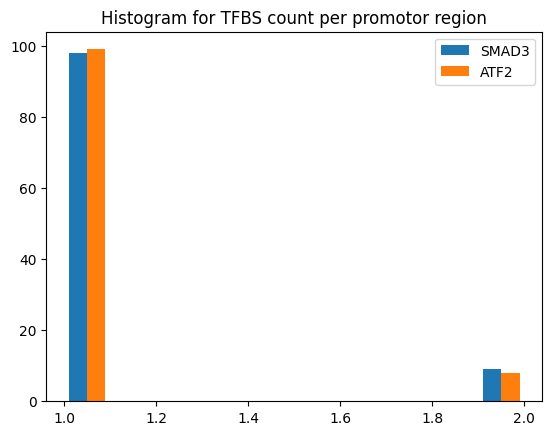

In [123]:
## Visualisation 
x = np.arange(len(atf_homo_counts))
width = 0.35
plt.hist([smad_homo_counts,atf_homo_counts],  label=["SMAD3","ATF2"], histtype="bar")
plt.legend()
plt.title("Histogram for TFBS count per promotor region")
#plt.savefig("/sybig/home/jme/Bachelorarbeit/4.1_Visualisation_TFBS_combinations/ATF2_SMAD3_Histogram_TFBS_Count_per_Promotor.png")


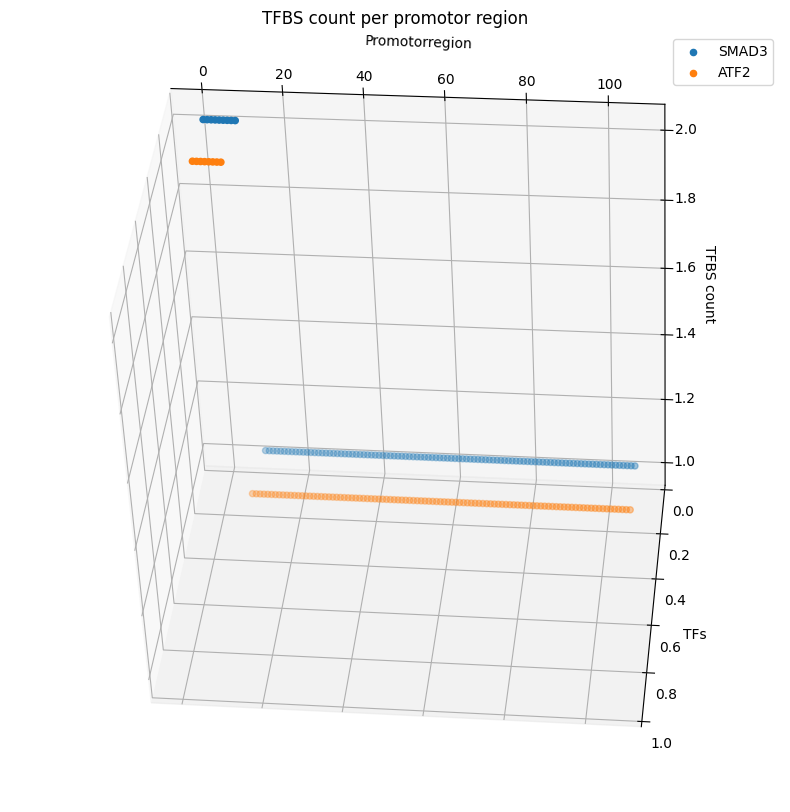

In [320]:
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

x = np.arange(len(atf_homo_counts))
#ax.hist([smad_homo_counts,atf_homo_counts],  label=["SMAD3","ATF2"], histtype="bar")


ax.scatter(x, smad_homo_counts, zs=0 ,zdir="z",  label='SMAD3')
ax.scatter(x, atf_homo_counts, zs=2/10 ,zdir="z",  label='ATF2')


#ax.set_xlim(0, len(x))
#ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.set_xlabel('Promotorregion')
ax.set_ylabel('TFBS count')
ax.set_zlabel('TFs')

ax.legend()

ax.view_init(elev=130., azim=-100, roll=-10)
plt.title("TFBS count per promotor region")
#plt.savefig("/sybig/home/jme/Bachelorarbeit/4.1_Visualisation_TFBS_combinations/ATF2_SMAD3_TFBS_Count_per_Promotor.png")
plt.show()

In [ ]:
#Test 
chr_lst_atf_smad = np.unique(atf_homo["chr"].to_numpy())

array_2D = [atf_homo[atf_homo["chr"]==i]["geneID"].value_counts().to_numpy() for i in chr_lst_atf_smad]
x,y = np.unique(array_2D[0], return_counts=True)
x,yc

In [ ]:
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')


#ax.hist([smad_homo_counts,atf_homo_counts],  label=["SMAD3","ATF2"], histtype="bar")

for idx, chr  in enumerate(array_2D):
    x,y = np.unique(chr, return_counts=True)
    ax.scatter(x, y, zs=idx ,zdir="z",  label=chr_lst_atf_smad[idx], alpha= .7)


#ax.set_xlim(0, len(x))
#ax.set_ylim(0, 1)
#ax.set_zlim(0, len(array_2D))

ax.set_xlabel('Frequency per Promotor')
ax.set_ylabel('Frequency')
ax.set_zlabel('Chromosomes')

ax.set_zticks(np.arange(len(chr_lst_atf_smad)), labels=chr_lst_atf_smad)

ax.legend()

ax.view_init(elev=130., azim=-100, roll=-10)
plt.title("TFBS count per promotor region")
#plt.savefig("/sybig/home/jme/Bachelorarbeit/4.1_Visualisation_TFBS_combinations/ATF2_SMAD3_TFBS_Count_per_Promotor.png")
plt.show()

#### Orientation